In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [5]:
X = data.data
y = data.target

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [43]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-100, 100),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.0, nesterov=False, decay=0.0),
                  metrics=['accuracy']                  
                 )
    
    return model

In [44]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 10000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint],
                    verbose=2
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
 - 0s - loss: 0.6145 - acc: 0.6813 - val_loss: 0.5460 - val_acc: 0.6491
Epoch 2/1000
 - 0s - loss: 0.5412 - acc: 0.6901 - val_loss: 0.5280 - val_acc: 0.8509
Epoch 3/1000
 - 0s - loss: 0.5244 - acc: 0.7626 - val_loss: 0.5093 - val_acc: 0.8421
Epoch 4/1000
 - 0s - loss: 0.5078 - acc: 0.8110 - val_loss: 0.4940 - val_acc: 0.8421
Epoch 5/1000
 - 0s - loss: 0.4952 - acc: 0.7868 - val_loss: 0.4841 - val_acc: 0.9035
Epoch 6/1000
 - 0s - loss: 0.4811 - acc: 0.8637 - val_loss: 0.4680 - val_acc: 0.8509
Epoch 7/1000
 - 0s - loss: 0.4701 - acc: 0.8110 - val_loss: 0.4687 - val_acc: 0.9211
Epoch 8/1000
 - 0s - loss: 0.4614 - acc: 0.8571 - val_loss: 0.4450 - val_acc: 0.8947
Epoch 9/1000
 - 0s - loss: 0.4500 - acc: 0.8571 - val_loss: 0.4363 - val_acc: 0.9035
Epoch 10/1000
 - 0s - loss: 0.4432 - acc: 0.8659 - val_loss: 0.4250 - val_acc: 0.8772
Epoch 11/1000
 - 0s - loss: 0.4312 - acc: 0.8637 - val_loss: 0.4165 - val_acc: 0.8772
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.2547 - acc: 0.9143 - val_loss: 0.2445 - val_acc: 0.9035
Epoch 97/1000
 - 0s - loss: 0.2543 - acc: 0.9121 - val_loss: 0.2442 - val_acc: 0.9123
Epoch 98/1000
 - 0s - loss: 0.2528 - acc: 0.9099 - val_loss: 0.2456 - val_acc: 0.9035
Epoch 99/1000
 - 0s - loss: 0.2526 - acc: 0.9121 - val_loss: 0.2408 - val_acc: 0.8947
Epoch 100/1000
 - 0s - loss: 0.2526 - acc: 0.9099 - val_loss: 0.2440 - val_acc: 0.9123
Epoch 101/1000
 - 0s - loss: 0.2537 - acc: 0.9077 - val_loss: 0.2418 - val_acc: 0.9123
Epoch 102/1000
 - 0s - loss: 0.2505 - acc: 0.9121 - val_loss: 0.2433 - val_acc: 0.9123
Epoch 103/1000
 - 0s - loss: 0.2509 - acc: 0.9121 - val_loss: 0.2424 - val_acc: 0.9123
Epoch 104/1000
 - 0s - loss: 0.2493 - acc: 0.9121 - val_loss: 0.2409 - val_acc: 0.9123
Epoch 105/1000
 - 0s - loss: 0.2490 - acc: 0.9121 - val_loss: 0.2393 - val_acc: 0.9035
Epoch 106/1000
 - 0s - loss: 0.2489 - acc: 0.9099 - val_loss: 0.2380 - val_acc: 0.8947
Epoch 107/1000
 - 0s - loss: 0.2482 - acc: 0.91

Epoch 191/1000
 - 0s - loss: 0.2203 - acc: 0.9121 - val_loss: 0.2229 - val_acc: 0.9123
Epoch 192/1000
 - 0s - loss: 0.2204 - acc: 0.9121 - val_loss: 0.2196 - val_acc: 0.9211
Epoch 193/1000
 - 0s - loss: 0.2199 - acc: 0.9121 - val_loss: 0.2239 - val_acc: 0.9123
Epoch 194/1000
 - 0s - loss: 0.2195 - acc: 0.9209 - val_loss: 0.2196 - val_acc: 0.9211
Epoch 195/1000
 - 0s - loss: 0.2198 - acc: 0.9121 - val_loss: 0.2182 - val_acc: 0.9123
Epoch 196/1000
 - 0s - loss: 0.2187 - acc: 0.9121 - val_loss: 0.2174 - val_acc: 0.9123
Epoch 197/1000
 - 0s - loss: 0.2184 - acc: 0.9143 - val_loss: 0.2208 - val_acc: 0.9211
Epoch 198/1000
 - 0s - loss: 0.2184 - acc: 0.9143 - val_loss: 0.2165 - val_acc: 0.9123
Epoch 199/1000
 - 0s - loss: 0.2183 - acc: 0.9143 - val_loss: 0.2165 - val_acc: 0.9123
Epoch 200/1000
 - 0s - loss: 0.2181 - acc: 0.9165 - val_loss: 0.2154 - val_acc: 0.9123
Epoch 201/1000
 - 0s - loss: 0.2177 - acc: 0.9121 - val_loss: 0.2179 - val_acc: 0.9211
Epoch 202/1000
 - 0s - loss: 0.2176 - acc: 

 - 0s - loss: 0.2046 - acc: 0.9187 - val_loss: 0.2081 - val_acc: 0.9211
Epoch 286/1000
 - 0s - loss: 0.2035 - acc: 0.9165 - val_loss: 0.2070 - val_acc: 0.9123
Epoch 287/1000
 - 0s - loss: 0.2039 - acc: 0.9165 - val_loss: 0.2079 - val_acc: 0.9211
Epoch 288/1000
 - 0s - loss: 0.2037 - acc: 0.9187 - val_loss: 0.2074 - val_acc: 0.9211
Epoch 289/1000
 - 0s - loss: 0.2037 - acc: 0.9165 - val_loss: 0.2079 - val_acc: 0.9211
Epoch 290/1000
 - 0s - loss: 0.2038 - acc: 0.9165 - val_loss: 0.2061 - val_acc: 0.9123
Epoch 291/1000
 - 0s - loss: 0.2035 - acc: 0.9165 - val_loss: 0.2084 - val_acc: 0.9211
Epoch 292/1000
 - 0s - loss: 0.2030 - acc: 0.9187 - val_loss: 0.2072 - val_acc: 0.9211
Epoch 293/1000
 - 0s - loss: 0.2027 - acc: 0.9165 - val_loss: 0.2101 - val_acc: 0.9211
Epoch 294/1000
 - 0s - loss: 0.2025 - acc: 0.9187 - val_loss: 0.2061 - val_acc: 0.9123
Epoch 295/1000
 - 0s - loss: 0.2028 - acc: 0.9165 - val_loss: 0.2061 - val_acc: 0.9123
Epoch 296/1000
 - 0s - loss: 0.2029 - acc: 0.9187 - val_lo

Epoch 380/1000
 - 0s - loss: 0.1942 - acc: 0.9187 - val_loss: 0.2007 - val_acc: 0.9123
Epoch 381/1000
 - 0s - loss: 0.1942 - acc: 0.9187 - val_loss: 0.2030 - val_acc: 0.9211
Epoch 382/1000
 - 0s - loss: 0.1939 - acc: 0.9209 - val_loss: 0.2035 - val_acc: 0.9211
Epoch 383/1000
 - 0s - loss: 0.1939 - acc: 0.9209 - val_loss: 0.2020 - val_acc: 0.9211
Epoch 384/1000
 - 0s - loss: 0.1942 - acc: 0.9187 - val_loss: 0.2020 - val_acc: 0.9211
Epoch 385/1000
 - 0s - loss: 0.1942 - acc: 0.9209 - val_loss: 0.2044 - val_acc: 0.9211
Epoch 386/1000
 - 0s - loss: 0.1942 - acc: 0.9253 - val_loss: 0.2020 - val_acc: 0.9211
Epoch 387/1000
 - 0s - loss: 0.1934 - acc: 0.9253 - val_loss: 0.1992 - val_acc: 0.9123
Epoch 388/1000
 - 0s - loss: 0.1936 - acc: 0.9187 - val_loss: 0.2007 - val_acc: 0.9211
Epoch 389/1000
 - 0s - loss: 0.1934 - acc: 0.9209 - val_loss: 0.2005 - val_acc: 0.9211
Epoch 390/1000
 - 0s - loss: 0.1930 - acc: 0.9187 - val_loss: 0.2041 - val_acc: 0.9211
Epoch 391/1000
 - 0s - loss: 0.1942 - acc: 

 - 0s - loss: 0.1885 - acc: 0.9297 - val_loss: 0.1993 - val_acc: 0.9211
Epoch 475/1000
 - 0s - loss: 0.1878 - acc: 0.9253 - val_loss: 0.1975 - val_acc: 0.9211
Epoch 476/1000
 - 0s - loss: 0.1877 - acc: 0.9253 - val_loss: 0.1959 - val_acc: 0.9123
Epoch 477/1000
 - 0s - loss: 0.1882 - acc: 0.9253 - val_loss: 0.1966 - val_acc: 0.9123
Epoch 478/1000
 - 0s - loss: 0.1877 - acc: 0.9253 - val_loss: 0.1962 - val_acc: 0.9123
Epoch 479/1000
 - 0s - loss: 0.1873 - acc: 0.9253 - val_loss: 0.1984 - val_acc: 0.9211
Epoch 480/1000
 - 0s - loss: 0.1872 - acc: 0.9253 - val_loss: 0.1988 - val_acc: 0.9211
Epoch 481/1000
 - 0s - loss: 0.1873 - acc: 0.9253 - val_loss: 0.1988 - val_acc: 0.9211
Epoch 482/1000
 - 0s - loss: 0.1877 - acc: 0.9253 - val_loss: 0.1984 - val_acc: 0.9211
Epoch 483/1000
 - 0s - loss: 0.1873 - acc: 0.9253 - val_loss: 0.2017 - val_acc: 0.9211
Epoch 484/1000
 - 0s - loss: 0.1878 - acc: 0.9253 - val_loss: 0.1978 - val_acc: 0.9211
Epoch 485/1000
 - 0s - loss: 0.1868 - acc: 0.9253 - val_lo

Epoch 569/1000
 - 0s - loss: 0.1828 - acc: 0.9231 - val_loss: 0.1981 - val_acc: 0.9211
Epoch 570/1000
 - 0s - loss: 0.1832 - acc: 0.9253 - val_loss: 0.1982 - val_acc: 0.9211
Epoch 571/1000
 - 0s - loss: 0.1828 - acc: 0.9253 - val_loss: 0.1971 - val_acc: 0.9211
Epoch 572/1000
 - 0s - loss: 0.1822 - acc: 0.9253 - val_loss: 0.1965 - val_acc: 0.9211
Epoch 573/1000
 - 0s - loss: 0.1826 - acc: 0.9253 - val_loss: 0.1934 - val_acc: 0.9123
Epoch 574/1000
 - 0s - loss: 0.1826 - acc: 0.9253 - val_loss: 0.1943 - val_acc: 0.9211
Epoch 575/1000
 - 0s - loss: 0.1827 - acc: 0.9253 - val_loss: 0.1946 - val_acc: 0.9211
Epoch 576/1000
 - 0s - loss: 0.1831 - acc: 0.9275 - val_loss: 0.1944 - val_acc: 0.9211
Epoch 577/1000
 - 0s - loss: 0.1824 - acc: 0.9253 - val_loss: 0.1977 - val_acc: 0.9211
Epoch 578/1000
 - 0s - loss: 0.1824 - acc: 0.9275 - val_loss: 0.1951 - val_acc: 0.9211
Epoch 579/1000
 - 0s - loss: 0.1821 - acc: 0.9253 - val_loss: 0.1968 - val_acc: 0.9211
Epoch 580/1000
 - 0s - loss: 0.1829 - acc: 

Epoch 664/1000
 - 0s - loss: 0.1785 - acc: 0.9297 - val_loss: 0.1939 - val_acc: 0.9211
Epoch 665/1000
 - 0s - loss: 0.1790 - acc: 0.9253 - val_loss: 0.1970 - val_acc: 0.9211
Epoch 666/1000
 - 0s - loss: 0.1793 - acc: 0.9297 - val_loss: 0.1944 - val_acc: 0.9211
Epoch 667/1000
 - 0s - loss: 0.1791 - acc: 0.9275 - val_loss: 0.1934 - val_acc: 0.9211
Epoch 668/1000
 - 0s - loss: 0.1787 - acc: 0.9253 - val_loss: 0.1936 - val_acc: 0.9211
Epoch 669/1000
 - 0s - loss: 0.1786 - acc: 0.9275 - val_loss: 0.1950 - val_acc: 0.9211
Epoch 670/1000
 - 0s - loss: 0.1790 - acc: 0.9275 - val_loss: 0.1942 - val_acc: 0.9211
Epoch 671/1000
 - 0s - loss: 0.1787 - acc: 0.9253 - val_loss: 0.1948 - val_acc: 0.9211
Epoch 672/1000
 - 0s - loss: 0.1787 - acc: 0.9275 - val_loss: 0.1949 - val_acc: 0.9211
Epoch 673/1000
 - 0s - loss: 0.1785 - acc: 0.9253 - val_loss: 0.1950 - val_acc: 0.9211
Epoch 674/1000
 - 0s - loss: 0.1784 - acc: 0.9275 - val_loss: 0.1949 - val_acc: 0.9211
Epoch 675/1000
 - 0s - loss: 0.1785 - acc: 

 - 0s - loss: 0.1761 - acc: 0.9297 - val_loss: 0.1909 - val_acc: 0.9123
Epoch 759/1000
 - 0s - loss: 0.1763 - acc: 0.9275 - val_loss: 0.1933 - val_acc: 0.9211
Epoch 760/1000
 - 0s - loss: 0.1754 - acc: 0.9297 - val_loss: 0.1930 - val_acc: 0.9211
Epoch 761/1000
 - 0s - loss: 0.1760 - acc: 0.9297 - val_loss: 0.1934 - val_acc: 0.9211
Epoch 762/1000
 - 0s - loss: 0.1756 - acc: 0.9275 - val_loss: 0.1932 - val_acc: 0.9211
Epoch 763/1000
 - 0s - loss: 0.1755 - acc: 0.9297 - val_loss: 0.1938 - val_acc: 0.9211
Epoch 764/1000
 - 0s - loss: 0.1757 - acc: 0.9297 - val_loss: 0.1923 - val_acc: 0.9211
Epoch 765/1000
 - 0s - loss: 0.1755 - acc: 0.9297 - val_loss: 0.1946 - val_acc: 0.9211
Epoch 766/1000
 - 0s - loss: 0.1759 - acc: 0.9297 - val_loss: 0.1935 - val_acc: 0.9211
Epoch 767/1000
 - 0s - loss: 0.1757 - acc: 0.9297 - val_loss: 0.1958 - val_acc: 0.9211
Epoch 768/1000
 - 0s - loss: 0.1756 - acc: 0.9297 - val_loss: 0.1928 - val_acc: 0.9211
Epoch 769/1000
 - 0s - loss: 0.1768 - acc: 0.9253 - val_lo

Epoch 853/1000
 - 0s - loss: 0.1731 - acc: 0.9297 - val_loss: 0.1915 - val_acc: 0.9211
Epoch 854/1000
 - 0s - loss: 0.1730 - acc: 0.9297 - val_loss: 0.1910 - val_acc: 0.9211
Epoch 855/1000
 - 0s - loss: 0.1732 - acc: 0.9297 - val_loss: 0.1903 - val_acc: 0.9123
Epoch 856/1000
 - 0s - loss: 0.1732 - acc: 0.9319 - val_loss: 0.1931 - val_acc: 0.9211
Epoch 857/1000
 - 0s - loss: 0.1731 - acc: 0.9297 - val_loss: 0.1937 - val_acc: 0.9211
Epoch 858/1000
 - 0s - loss: 0.1730 - acc: 0.9297 - val_loss: 0.1924 - val_acc: 0.9211
Epoch 859/1000
 - 0s - loss: 0.1730 - acc: 0.9297 - val_loss: 0.1921 - val_acc: 0.9211
Epoch 860/1000
 - 0s - loss: 0.1730 - acc: 0.9297 - val_loss: 0.1918 - val_acc: 0.9211
Epoch 861/1000
 - 0s - loss: 0.1732 - acc: 0.9297 - val_loss: 0.1909 - val_acc: 0.9211
Epoch 862/1000
 - 0s - loss: 0.1731 - acc: 0.9297 - val_loss: 0.1896 - val_acc: 0.9123
Epoch 863/1000
 - 0s - loss: 0.1733 - acc: 0.9319 - val_loss: 0.1911 - val_acc: 0.9211
Epoch 864/1000
 - 0s - loss: 0.1727 - acc: 

 - 0s - loss: 0.1712 - acc: 0.9297 - val_loss: 0.1937 - val_acc: 0.9211
Epoch 948/1000
 - 0s - loss: 0.1711 - acc: 0.9297 - val_loss: 0.1894 - val_acc: 0.9123
Epoch 949/1000
 - 0s - loss: 0.1712 - acc: 0.9297 - val_loss: 0.1900 - val_acc: 0.9211
Epoch 950/1000
 - 0s - loss: 0.1705 - acc: 0.9297 - val_loss: 0.1922 - val_acc: 0.9211
Epoch 951/1000
 - 0s - loss: 0.1709 - acc: 0.9297 - val_loss: 0.1908 - val_acc: 0.9211
Epoch 952/1000
 - 0s - loss: 0.1705 - acc: 0.9297 - val_loss: 0.1911 - val_acc: 0.9211
Epoch 953/1000
 - 0s - loss: 0.1705 - acc: 0.9297 - val_loss: 0.1922 - val_acc: 0.9211
Epoch 954/1000
 - 0s - loss: 0.1711 - acc: 0.9297 - val_loss: 0.1918 - val_acc: 0.9211
Epoch 955/1000
 - 0s - loss: 0.1710 - acc: 0.9297 - val_loss: 0.1907 - val_acc: 0.9211
Epoch 956/1000
 - 0s - loss: 0.1708 - acc: 0.9297 - val_loss: 0.1935 - val_acc: 0.9211
Epoch 957/1000
 - 0s - loss: 0.1704 - acc: 0.9297 - val_loss: 0.1935 - val_acc: 0.9211
Epoch 958/1000
 - 0s - loss: 0.1709 - acc: 0.9297 - val_lo

In [45]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [46]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.932
best validation accuracy: 0.921


# Weight analysis

In [47]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return l.shape[0] - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(0)

# Graphics

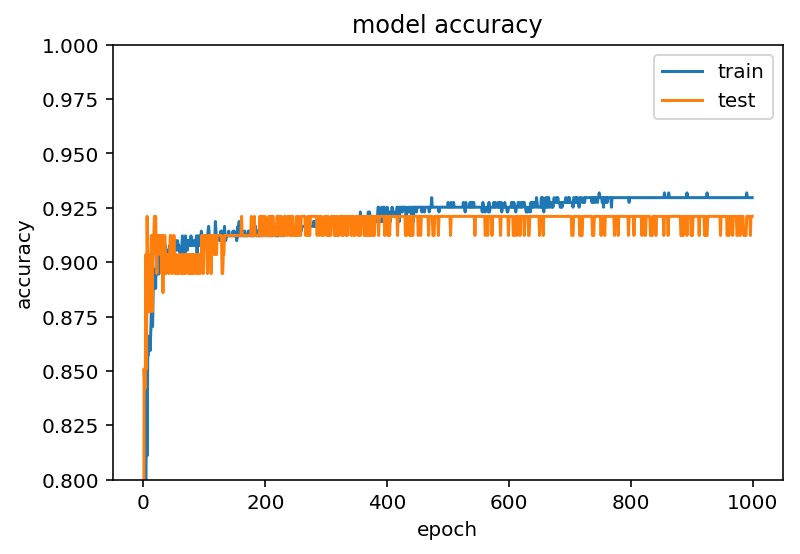

In [48]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.ylim([0.8, 1.0])
plt.show()

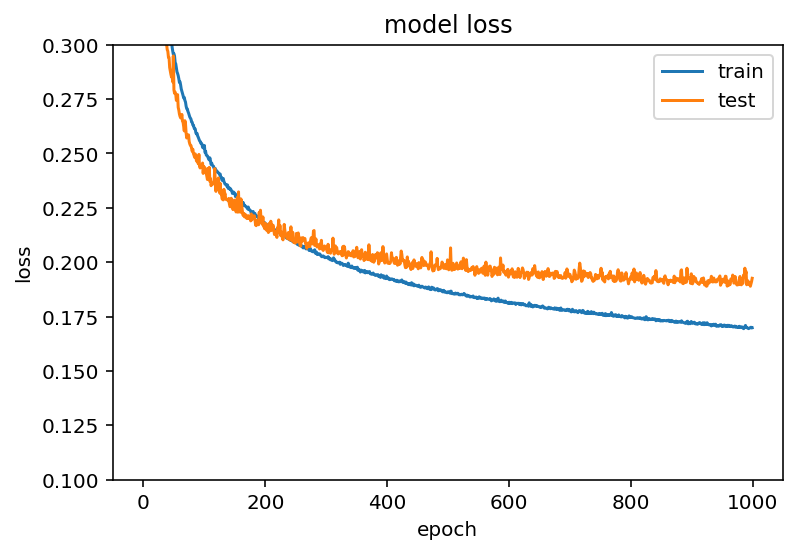

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.ylim([.1, .3])
plt.show()

In [72]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(np.abs(r['w1'])))
    first_layer_bias_avg.append(np.average(np.abs(r['b1'])))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(np.abs(r['w2'])))
    second_layer_bias_avg.append(np.average(np.abs(r['b2'])))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

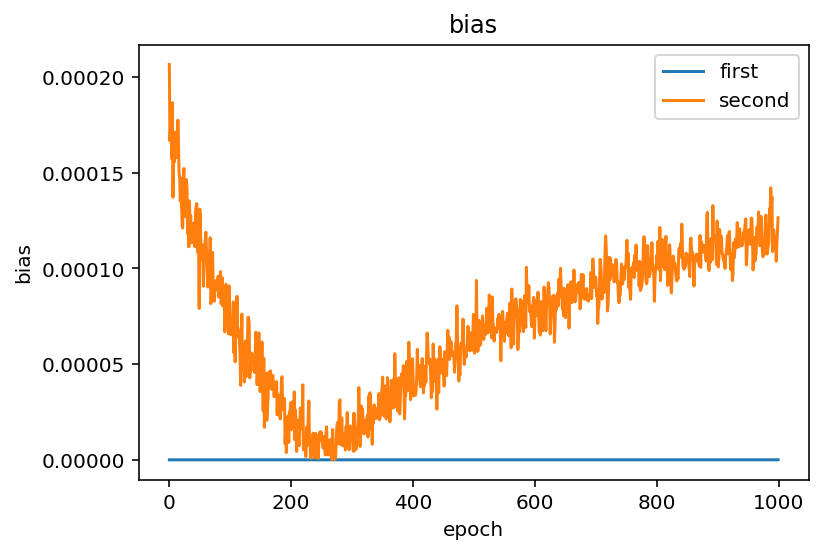

In [73]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='best')
# plt.ylim([-3e-9, 6e-9])
# plt.ylim([, 6e-9])
plt.show()

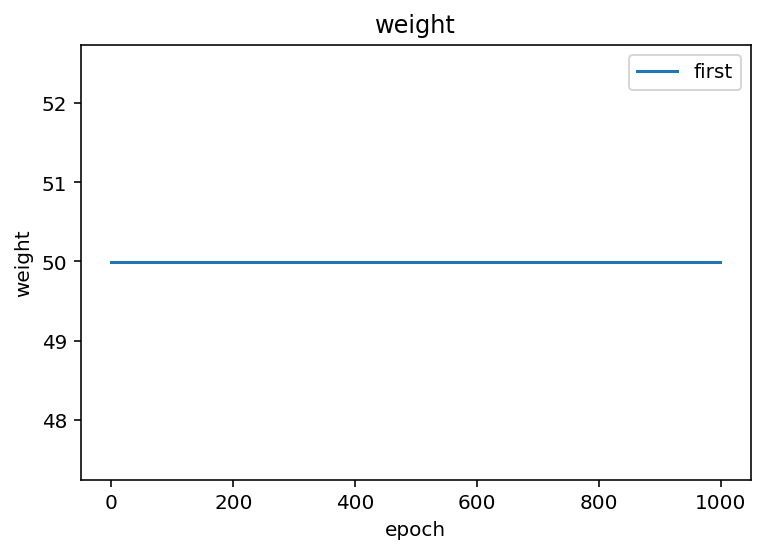

In [74]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

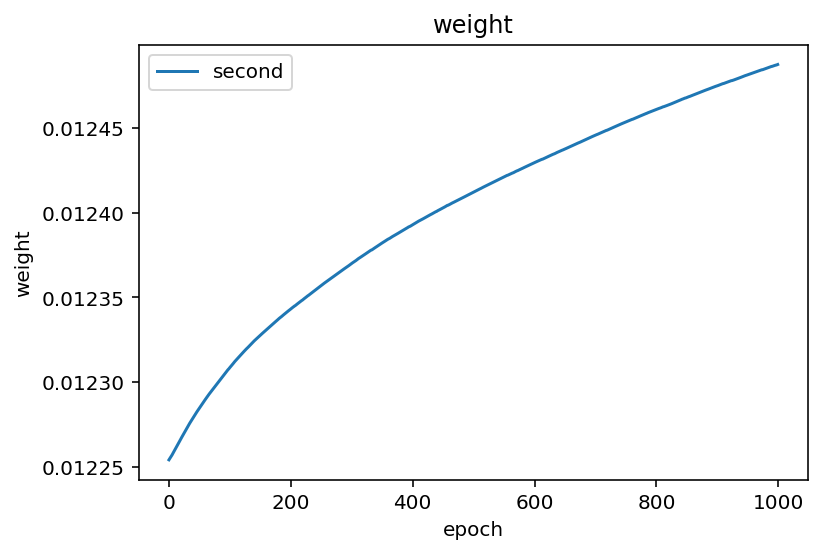

In [75]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

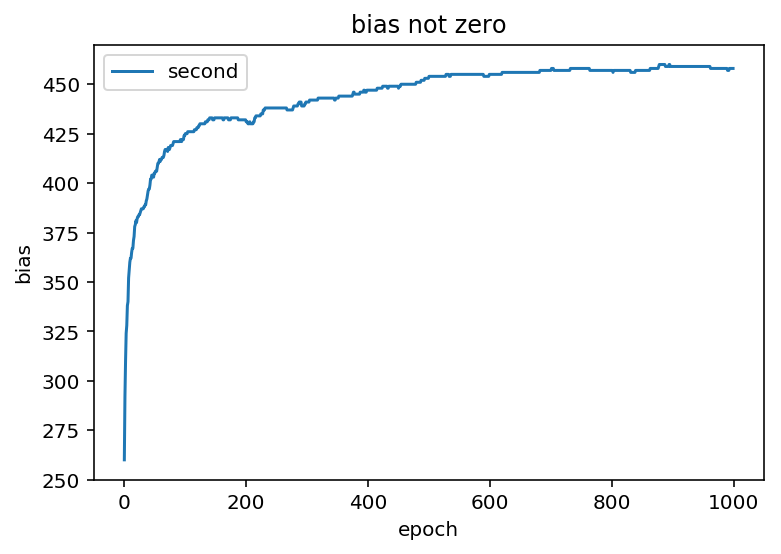

In [76]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

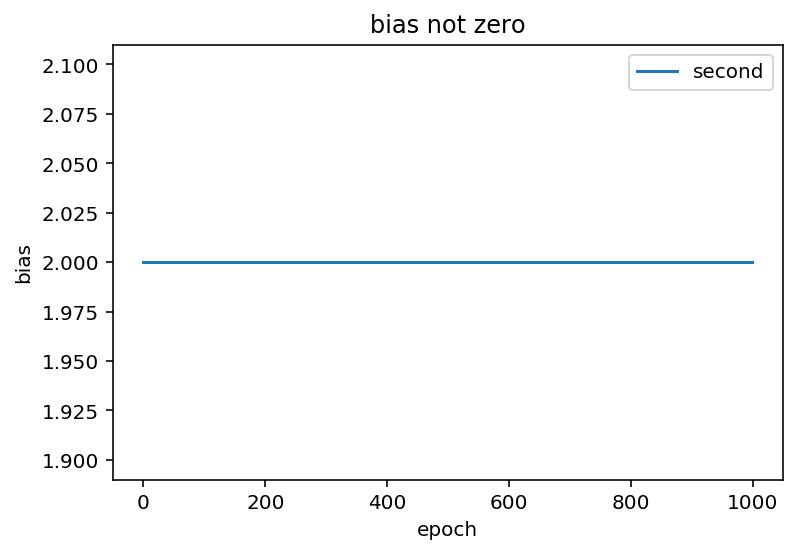

In [77]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

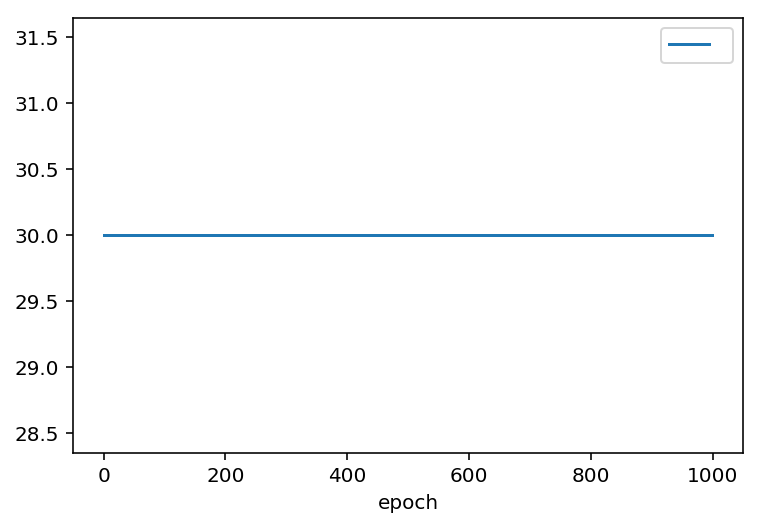

In [78]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

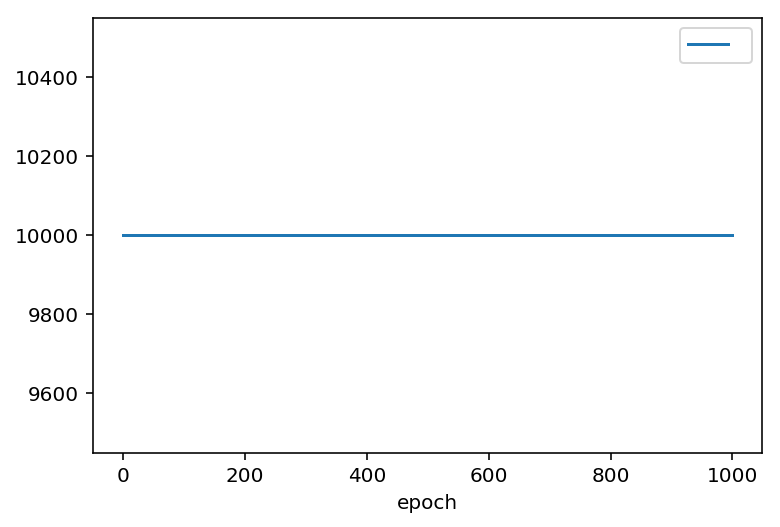

In [79]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

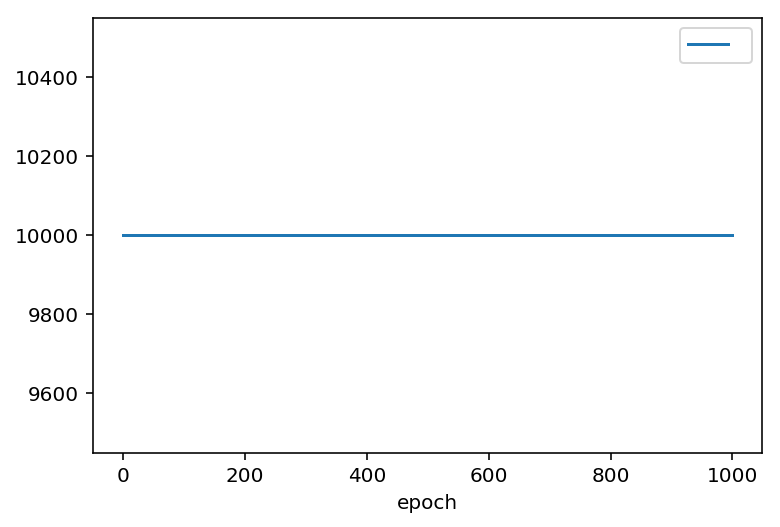

In [80]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

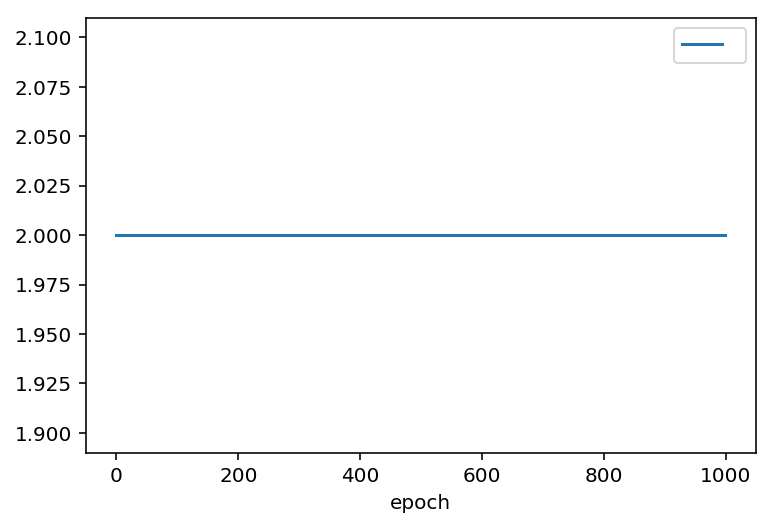

In [81]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()